## 딥러닝
- 18일 평가과제 : 텍스트 데이터 분석
- 이미지
- 자연어처리
- 영상인식
- 추천알고리즘
- 음성인식
- etc


## 새해 결심
- 올해는 딥러닝 배울래! 
  + 홈페이지 간다. https://www.tensorflow.org/tutorials
  + 교재 가급적 구매하지 않는다. 
    - 핸즈온 머신러닝 3판 나오면 구매 권유

In [ ]:
# 데이터 수집
# 패션 MNIST 
from tensorflow import keras 

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()



4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


## 이미지 출력

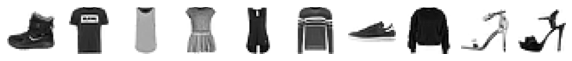

In [ ]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1, 10, figsize=(10, 10))

for i in range(10):
  ax[i].imshow(train_input[i], cmap = 'gray_r')
  ax[i].axis('off')
plt.show()

In [ ]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


- 주어진 데이터의 라벨 (종속변수)에 따른 각 이미지의 갯수를 확인해보자. 

In [ ]:
import numpy as np
print(np.unique(train_target, return_counts = True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 머신러닝에 대한 오해
- 전통적인 머신러닝 알고리즘은 이미지/자연어/추천 동작하지 않는다? 
- 딥러닝 만능설: 딥러닝 알고리즘은 모든 데이터에서 다 월등한 우위를 점한다.
- 머신러닝/딥러닝 알고리즘(도구)를 사용해서 다양하게 실험을 해본다. 

## 이미지 데이터 살짝 가공
- 스케일링 한다. 

In [ ]:
train_scaled = train_input / 255.0 
train_scaled = train_scaled.reshape(-1, 28 * 28)
train_scaled.shape

(60000, 784)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier 
sc = SGDClassifier(loss = 'log', max_iter = 5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(np.mean(scores['test_score']))

0.8195666666666668


## 텐서플로 프레임워크 모델만들기

In [ ]:
# 훈련데이터와 검증데이터로 분리
from sklearn.model_selection import train_test_split 

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state=42
)

In [ ]:
dense = keras.layers.Dense(10, activation='softmax', input_shape = (784, ))
model = keras.Sequential(dense)
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 5s 2ms/step - loss: 0.6100 - accuracy: 0.7939
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4797 - accuracy: 0.8395
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4581 - accuracy: 0.8472
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4442 - accuracy: 0.8519
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4373 - accuracy: 0.8554


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4405 - accuracy: 0.8525


[0.44045838713645935, 0.8525000214576721]

- 캐글 노트북, 구글 코랩 GPU 연산
  + 런타임 - 런타임 유형변경 - GPU 설정
  

In [1]:
# 데이터 수집
# 패션 MNIST 
from tensorflow import keras 

# 훈련데이터와 검증데이터로 분리
from sklearn.model_selection import train_test_split 

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0 
train_scaled = train_scaled.reshape(-1, 28 * 28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state=42
)

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
train_scaled.shape, val_scaled.shape, train_target.shape, val_target.shape

((48000, 784), (12000, 784), (48000,), (12000,))

## 딥러닝 모형 만들기
- 층(layer)를 구성한다. 

In [8]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784, ))
dense2 = keras.layers.Dense(10, activation='softmax')

# 심층신경망
model = keras.Sequential([dense1, dense2])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


- 다른 방법

In [10]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784, ), name = 'hidden'),
    keras.layers.Dense(10, activation='softmax', name = 'output')
], name = 'Fashion')

model.summary()

Model: "Fashion"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


- 모델 컴파일

In [11]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5622 - accuracy: 0.8081
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4089 - accuracy: 0.8535
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3748 - accuracy: 0.8653
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3519 - accuracy: 0.8727
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3346 - accuracy: 0.8791


- 1949년도 모델을 1970년대 모델로 업그레이드 함
  + 히든 레이어 추가함
  + 효과 : 정확도 3% 향상

## 시그모이드 함수 : 활성화 함수
- 시그모이드 (로지스틱 회귀분석)
- 가장 대표적으로, 일반적으로 자주 사용하는 활성화 함수 : ReLu 함수

In [12]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=(784, ), name = 'hidden'),
    keras.layers.Dense(10, activation='softmax', name = 'output')
], name = 'Fashion')

model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5318 - accuracy: 0.8121
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3970 - accuracy: 0.8564
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3566 - accuracy: 0.8719
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3343 - accuracy: 0.8798
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3184 - accuracy: 0.8856


In [13]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3635 - accuracy: 0.8736


[0.3635195195674896, 0.8735833168029785]

## 딥러닝 모형 과적합 확인


In [5]:
# 데이터 수집
# 패션 MNIST 
from tensorflow import keras 

# 훈련데이터와 검증데이터로 분리
from sklearn.model_selection import train_test_split 

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0 
# train_scaled = train_scaled.reshape(-1, 28 * 28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state=42
)

- 모델 만들기

In [6]:
def model_fn(a_layer=None):
  model = keras.Sequential() 
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [3]:
model = model_fn() 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 10, verbose=0)


In [14]:
print(history.history.keys())
print(history.history)

dict_keys(['loss', 'accuracy'])
{'loss': [0.309403657913208, 0.2971136271953583, 0.2894129455089569, 0.2844385504722595, 0.27549469470977783, 0.27134913206100464, 0.2645758092403412, 0.260617196559906, 0.2552677094936371, 0.2492922991514206], 'accuracy': [0.8895624876022339, 0.893750011920929, 0.8965833187103271, 0.9006249904632568, 0.9036250114440918, 0.9070000052452087, 0.9083541631698608, 0.9106875061988831, 0.9129583239555359, 0.914312481880188]}


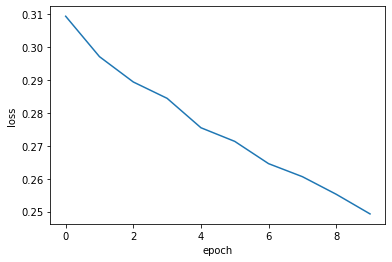

In [15]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
plt.show()

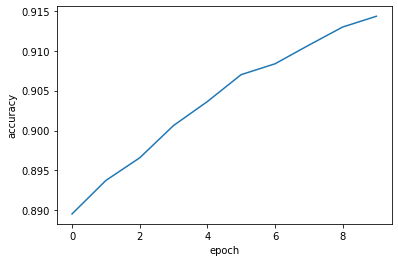

In [16]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()
ax.plot(history.history['accuracy'])
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
plt.show()

- 검증데이터 활용

In [19]:
history = model.fit(train_scaled, 
                    train_target, 
                    epochs = 20, 
                    verbose=0, 
                    validation_data = (val_scaled, val_target))


In [22]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


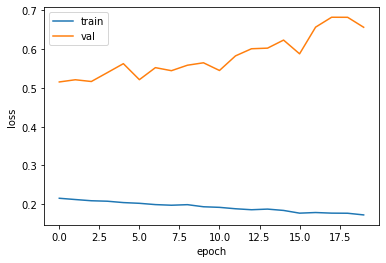

In [21]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- 과대적합(=과적합=Overfitting)

## 옵티마이저
- 모형 가속기 

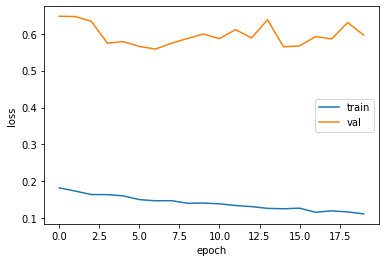

In [23]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = 'accuracy')

history = model.fit(train_scaled, 
                    train_target, 
                    epochs = 20, 
                    verbose=0, 
                    validation_data = (val_scaled, val_target))

fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 드롭아웃 
- 중요함. 
- 현재 문제점 : 과적합이 계속 일어남
  + 가장 확실한 방법 : 드롭아웃
- 과적합을 해소해줌
- 모형 학습 시간을 단축



## Early Stopping
- 모형 학습속도가 줄어듬
  + 예) epoch 1000번, 100번째 정확도가 99%. 남은 900번을 계속 해야 하는건가? 

In [24]:
# 데이터 수집
# 패션 MNIST 
from tensorflow import keras 

# 훈련데이터와 검증데이터로 분리
from sklearn.model_selection import train_test_split 

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0 
# train_scaled = train_scaled.reshape(-1, 28 * 28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state=42
)

def model_fn(a_layer=None):
  model = keras.Sequential() 
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [25]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


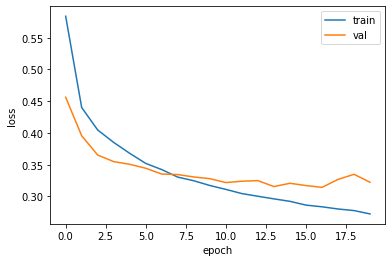

In [26]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = 'accuracy')

history = model.fit(train_scaled, 
                    train_target, 
                    epochs = 20, 
                    verbose=0, 
                    validation_data = (val_scaled, val_target))

fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 머신러닝/딥러닝 모형을 만들 때 연구자가 가장 신경써야 하는 포인트 : 과적합 방지  

## 모델 저장
- 모델 저장

In [27]:
model.save_weights('model-weights.h5')

In [28]:
model.save('model-whole.h5')

## 모델 불러오기

In [29]:
model2 = keras.models.load_model('model-whole.h5')
model2.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3223 - accuracy: 0.8885


[0.32233932614326477, 0.8884999752044678]

In [30]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3223 - accuracy: 0.8885


[0.32233932614326477, 0.8884999752044678]